# Project Foundations for Data Science: FoodHub Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Developer/Applied Data Science/Assessments/8 Aug FoodHub/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

* The DataFrame has 9 columns as mentioned in the Data Dictionary.
* Data in each row corresponds to the order placed by a customer.
* The numeric values are:  order_id,   customer_id, cost_of_the_order, rating, food_preparation_time, delivery_time


### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Write your code here
# using shape() to check the data
print("The dataset has", df.shape[0], "rows and ", df.shape[1], "columns.")

The dataset has 1898 rows and  9 columns.


#### Observations:
* The dataset has 1898 rows and  9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* Each colums have 1898 observations
* 'rating' is an object but should be an intiger type to draw conclusions over

**Analysing the rating column**

In [ ]:
# see the count of each unique value
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
# see the weight of NOT GIVEN
df['rating'].value_counts(normalize=True)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

38% of the times ratings are not give

In [ ]:
# Filtering for the rows with NOT GIVEN value
not_rated = df['rating'].isin(['Not given'])
# Replace the value of NOT GIVEN with null as string
df[not_rated] = df[not_rated].replace(['Not given'], '0')

In [ ]:
# Validate changes were made
df['rating'].value_counts()

0    736
5    588
4    386
3    188
Name: rating, dtype: int64

In [ ]:
# Change variable type to intiger
df['rating'] = df['rating'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   int64  
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 133.6+ KB


* 'rating' has now 0 value instead of NOT GIVEN, note a mean or median will need to exclude the 0 values as we consider the absence of rating is not iqual to 0 in value
* 'rating' it is an intiger type variable now

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [ ]:
# Write your code here
# checking for any missing values in each columns
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
* There are no missing data, in other words there are no empthy cells in the data set.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
# using min(), max() and mean() fntions to check the statistical summary for the time it takes for the food to be prepared
print("For the food to be prepared, once an order is placed, it takes at minimum ", df['food_preparation_time'].min(), "min and maximum", df['food_preparation_time'].max(), "min. The average time it takes is", round(df['food_preparation_time'].mean(), 2), "min")

For the food to be prepared, once an order is placed, it takes at minimum  20 min and maximum 35 min. The average time it takes is 27.37 min


#### Observations:
* For the food to be prepared, once an order is placed, it takes at minimum  20 min and maximum 35 min.
* The average time it takes is 27.37 min


### **Question 5:** How many orders are not rated?

In [ ]:
# Write the code here
not_rated = df.loc[df['rating'] < 1]    # conditioning for orders that do not have a rating of min 1 and storing them in a variable
not_rated['rating'].value_counts()      # counting them up


0    736
Name: rating, dtype: int64

#### Observations:
* Out of the 1898 orders, 736 are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

In [ ]:
# Write the code here
def histogram_boxplot(feature, figsize=(10, 5), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()

**Observations on Order ID**

In [ ]:
df['order_id'].nunique()

1898

There are 1898 unique  order ids. Each row in the data set represent an new order.

**Observations on Customer ID**

In [ ]:
df['customer_id'].nunique()

1200

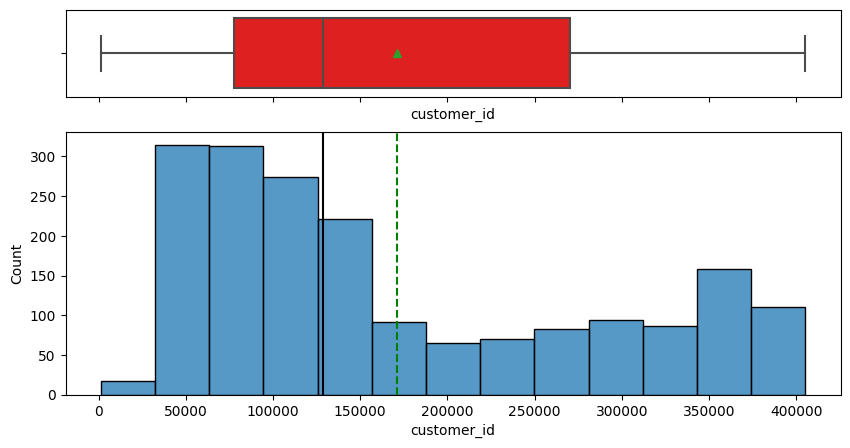

In [ ]:
histogram_boxplot(df['customer_id'])

**Observations:**
* there are 1200 registered users in the dataset
* the  mean  is higher than the median, indicating a right skewness of the data, expecting to find top customers in further analysis


**Observations of Restaurants**

In [ ]:
df['restaurant_name'].nunique()

178

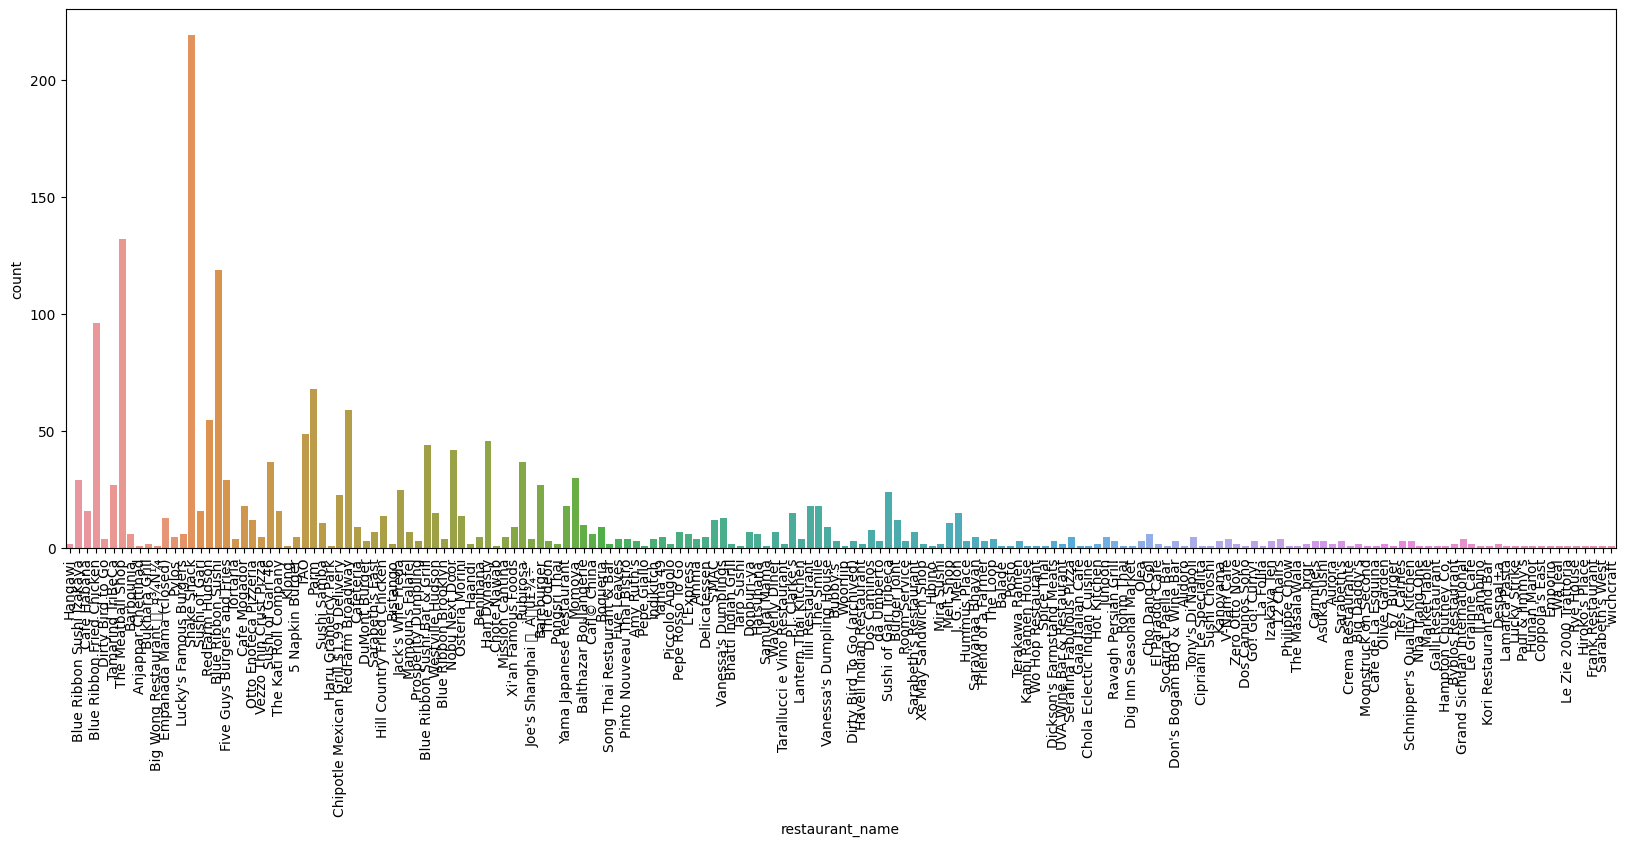

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(data=df, x='restaurant_name');
plt.xticks(rotation=90)
plt.show()

Observations:
* There are 178 restaurance
* The top restaurante has 200+ orders within the dataset
* There are about 30 restaurants with most orders.
Further, multivariate, analysis is needed

**Observations of Cuisine type**

In [ ]:
df['cuisine_type'].nunique()

14

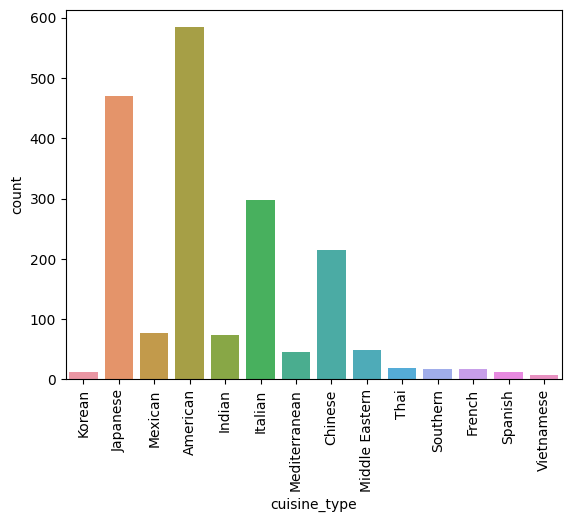

In [ ]:
sns.countplot(data=df, x='cuisine_type');
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['cuisine_type'].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

**Observations:**
*  14 cuisine types are present in the data
* There are a top 4  cousine types; american, japanese, italian, chinese
* The order amounts by cousin types go between 7 and 584

**Observations on Cost of order**

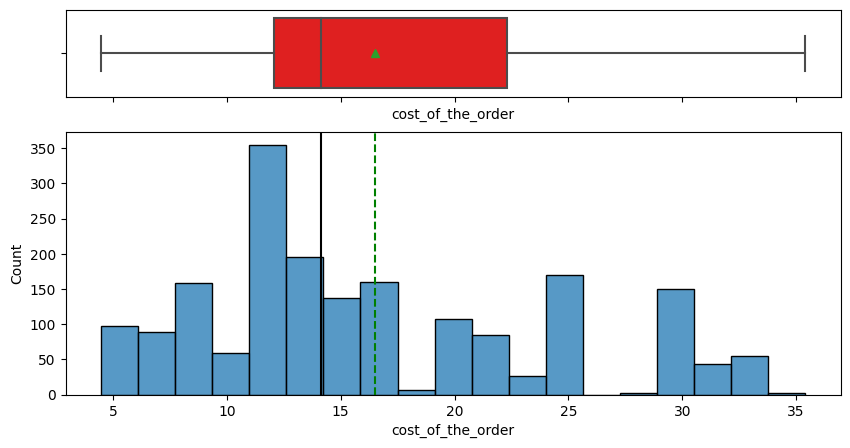

In [ ]:
histogram_boxplot(df['cost_of_the_order'])

**Observations:**
*        the mean (16.49) is higher then the median (14.14), there is right skewness in the data
*        the majority of order (50%) value is between 12.08 and 22.29
*        there are no outliers
*        the highest value is 35.41, it is double of the mean, indicating an order for more than one person

**Observations of Day of the Week**

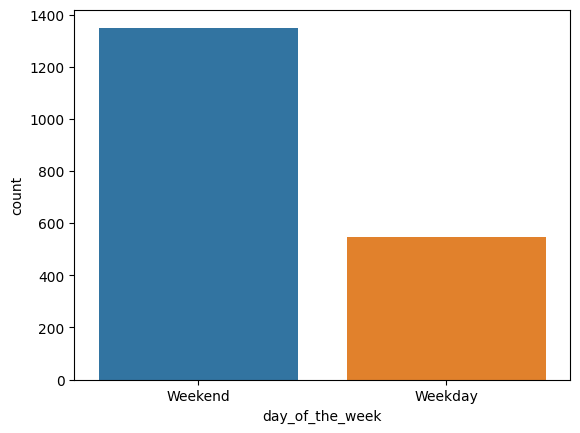

In [ ]:
sns.countplot(data=df, x='day_of_the_week');

In [ ]:
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

**Observations:**
* Most of the orders are on weekends, 1351 orders, while during the week there are 547 observations

**Observations on Rating**

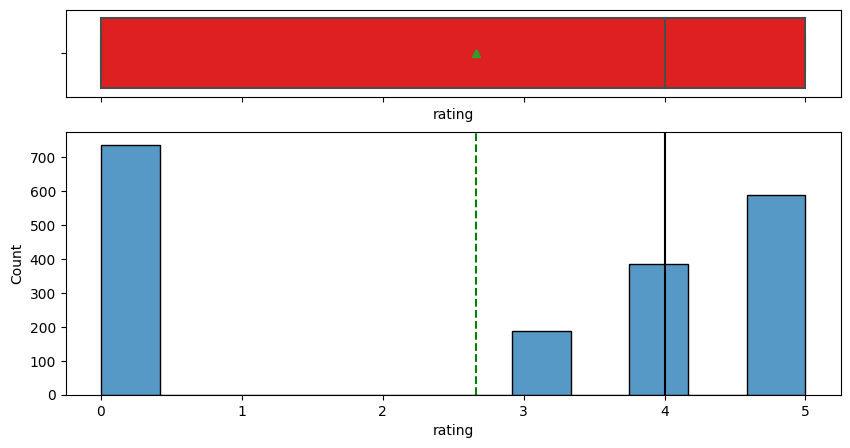

In [ ]:
histogram_boxplot(df['rating'])

**Observations:**
*   The mean of ratings is 4, as 38% of the orders do not receive a rating the  mean is not relevant, but it is a  point to improve for the future
*    the data is highly left skewed considering the 0 values, but ignoring it, in fact most of the deliveries result in top ranking  ranking, indicating a good selection of restaurants being available in the app. Interesting to understand later on if for the lowest ratings we can observe any correlations  


**Observations on Food preparation time**

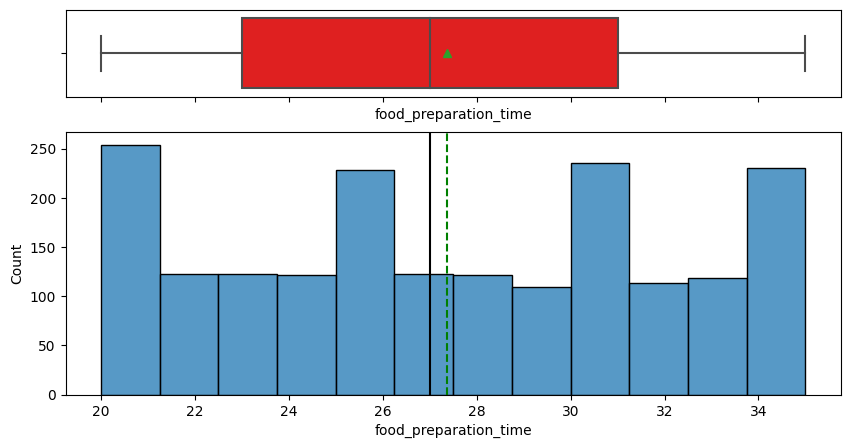

In [ ]:
histogram_boxplot(df['food_preparation_time'])

**Observations:**
*   the mean (27.37) is higher than the median (27)  
*   the min amount of time to prepare the meals is 20 min with max of 35 min
*   there are no outliers in the data

**Observations on Delivery time**

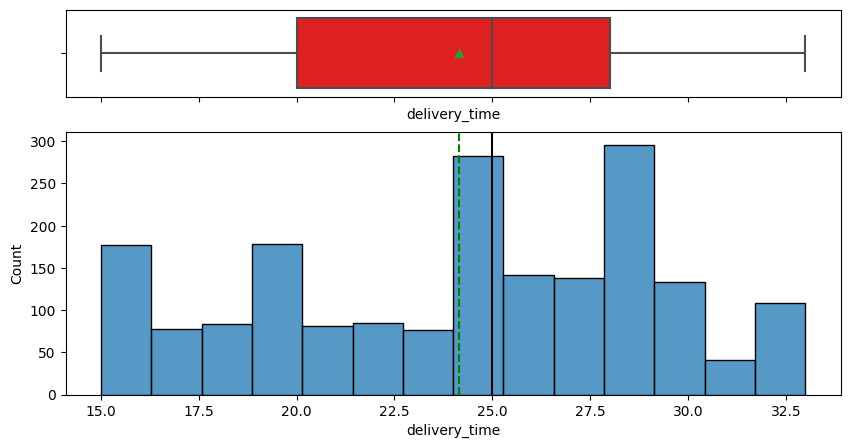

In [ ]:
histogram_boxplot(df['delivery_time'])

**Observations:**
*     the mean (24.16) is lower than the median (25)
*     minimum time it takes to deliver a meal is 15 min while the max is 33 min, the majority of the delivery time is within the 20 - 28min range
*     there are no outliers oberved
*     the highest  value in the  data  is 33min,  indicating a longer distance from the restaurante, raising questions if peopple living further away from the restaurance are more likely to order

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Write the code here
restaurants = df['restaurant_name'].value_counts() # catch the amount of orders by restaurances in top_5 variable
restaurants.nlargest(5)                            # return the list of restaurants that sell the most, top 5

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
Interms  of number of orders  received the top 5 restaurance are:

1.   Shake Shack with 219 orders

2.   The Meatball Shop with 132 orders

3.   Blue Ribbon Sushi with 119 orders

4.   Blue Ribbon Fried Chicken with 96 orders

5.   Parm with 68 orders

### **Question 8**: Which is the most popular cuisine on weekends?

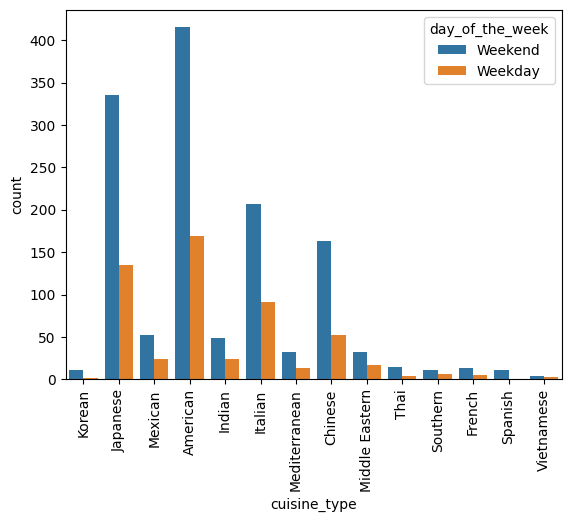

In [ ]:
# Write the code here
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week'); # plot the cuisine type by the day of the week as category
plt.xticks(rotation=90)  # rotatethe x labels so that are readable
plt.show()


#### Observations:
The most popular cusine on weekends is american, with over 400 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code here
# Creating intiger variables
total = 0
higher_than_20 = 0
iqual_lower_than_20 = 0
for cost in df['cost_of_the_order']:                   # looping through the rows to see if price is higher than 20
  if cost > 20:                                        # if price is higher than 20 count it in variable higher_than_20
    higher_than_20 = higher_than_20 + 1
  else:                                                # if price is iquals or lower than 20 count it in variable iqual_lower_than_20
    iqual_lower_than_20 = iqual_lower_than_20 + 1
    cost ++1                                           # continue looping
total = higher_than_20 + iqual_lower_than_20           # count up the total, to validate all rows were considered and to use it for the % calculation
print("The percentage of the orders cost more than 20 dollars (>20) is ", round((higher_than_20/total)*100, 2), "%")        # response to the question


The percentage of the orders cost more than 20 dollars (>20) is  29.24 %


#### Observations:
* There are 555 orders with a price higher than 20 USD out of 1898 observations.
* The percentage of the orders cost more than 20 dollars (>20) is  29.24 %

### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here
# calculating the mean of delivery time
print("The mean order delivery time is: ", round(df['delivery_time'].mean(), 2), "min")

The mean order delivery time is:  24.16 min


#### Observations:
* The mean order delivery time is:  24.16 min

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
# Write the code here
customers = df['customer_id'].value_counts()   # store the list of customes and their number of orders in 'customer'
customers.nlargest(3)                          # return the list of customers with the top 3 orders

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
* The most frequent customers are:
    1. customer id 52832 with 13 orders
    2. customer id 47440 with 10 orders
    3. customer id 83287 with 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)


**Observations of Cuisine type and Day of the week**

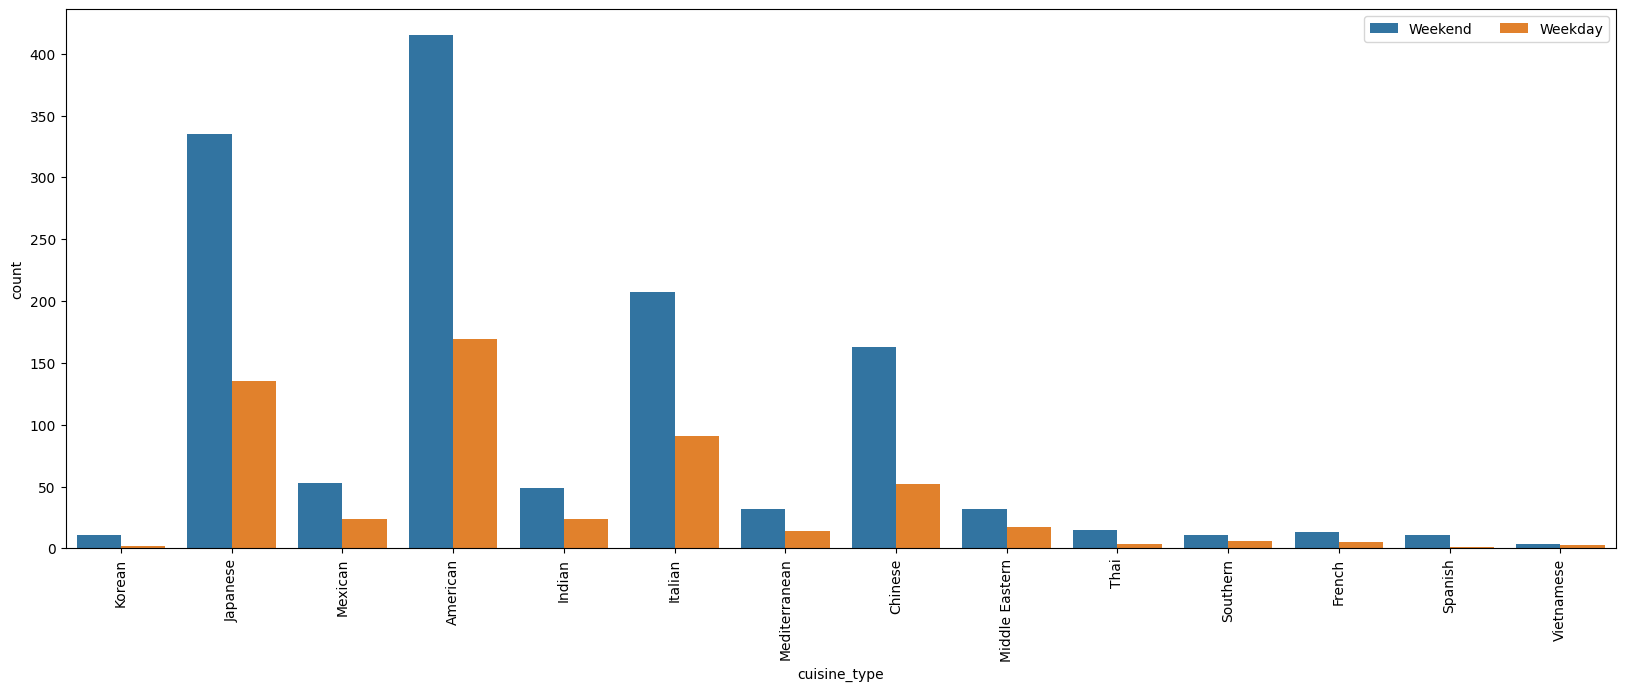

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90)
plt.legend(loc='best', ncol=2)
plt.show() # this will ensure that the plot is displayed without the text

**Observations:**
* Spanish, Thai and Korean are rarely ordered during the week
* Vietnamese have low orders in general

**Observations of food preparation and delivery time by cuisine type**




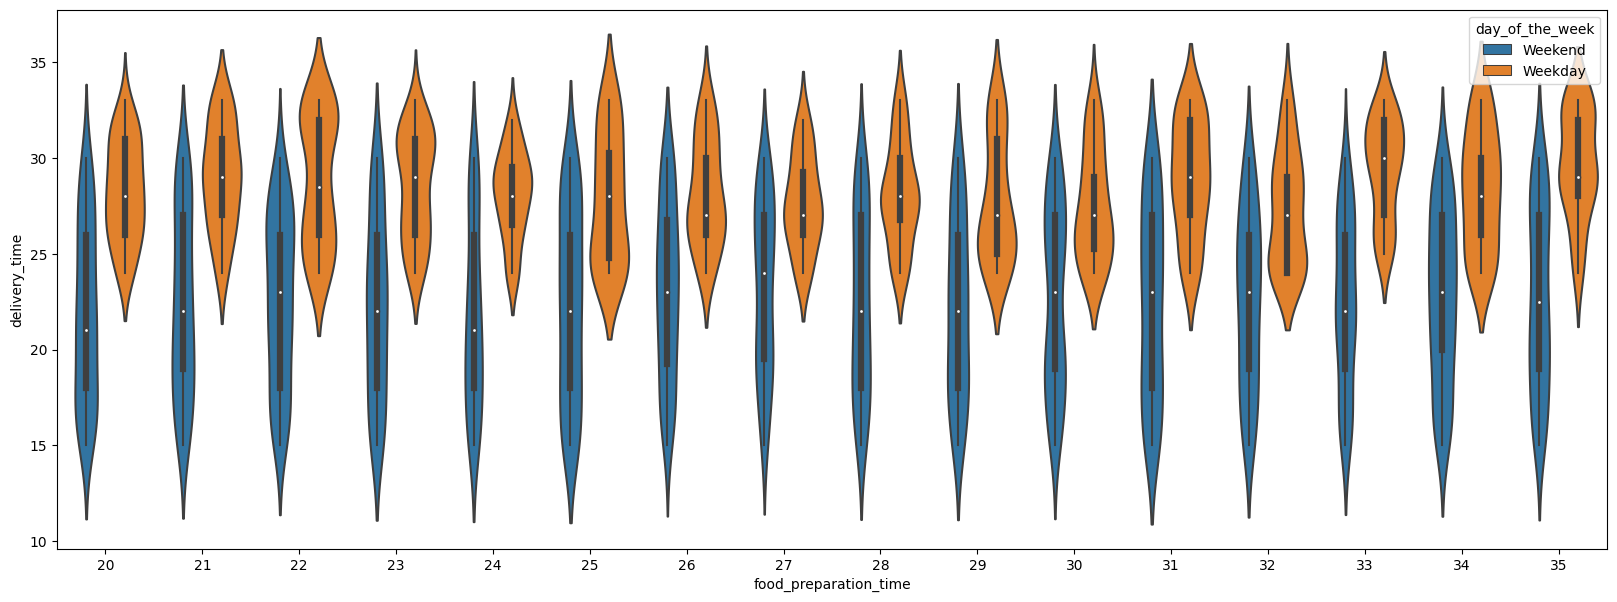

In [ ]:
plt.figure(figsize=(20,7))
sns.violinplot(data=df, x='food_preparation_time', y='delivery_time', hue='day_of_the_week');
plt.show()

**Observations:**
* delivery time is longer weekdays


**Observations of Food preparation time by cuisine type**

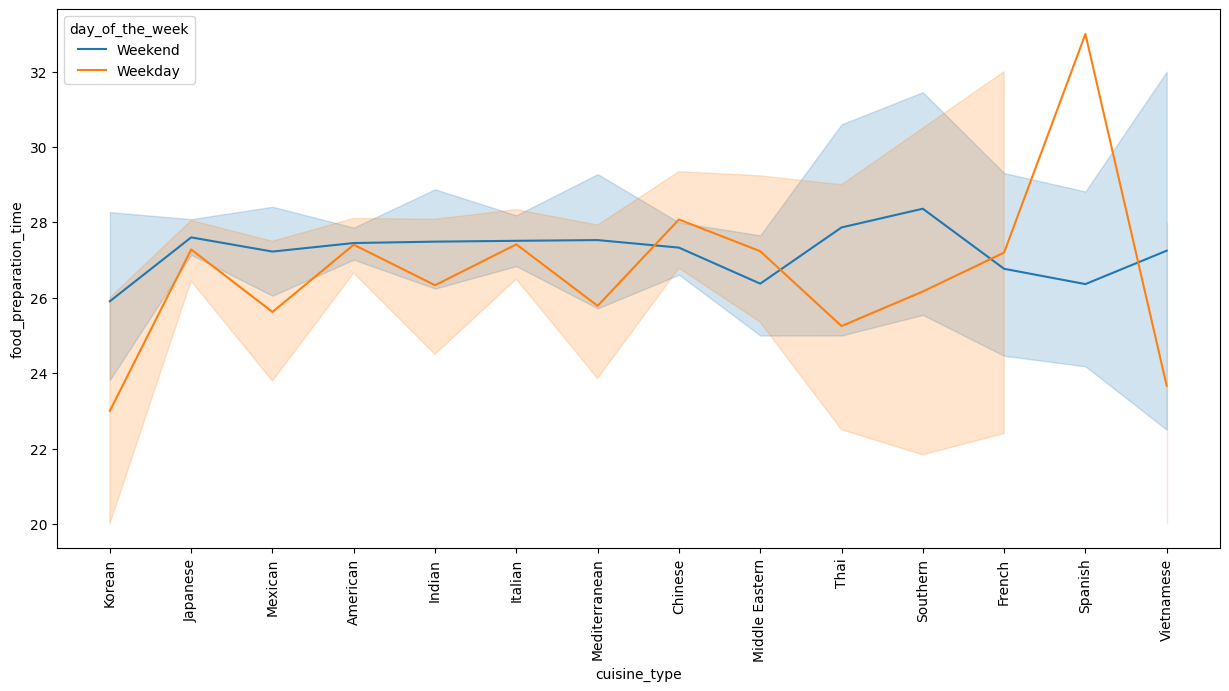

In [ ]:
plt.figure(figsize = (15,7))
sns.lineplot(data=df, x='cuisine_type', y='food_preparation_time', hue='day_of_the_week');
plt.xticks(rotation=90)
plt.show()

**Observations:**
* Spanish cuisine preparation time varies greatly between weekdays and weekends, could be the driver of low orders
* American, Italian and Japanese have a standard preparation type independent from the day of theweek, indicating reliability
* Vietnamese, Korean, Thai have significant variance on preparation time which could be the driver of low orders

Questions to validate if the app is correctly communicating the food preparation time.

**Observations of Rating by Cuisine type**

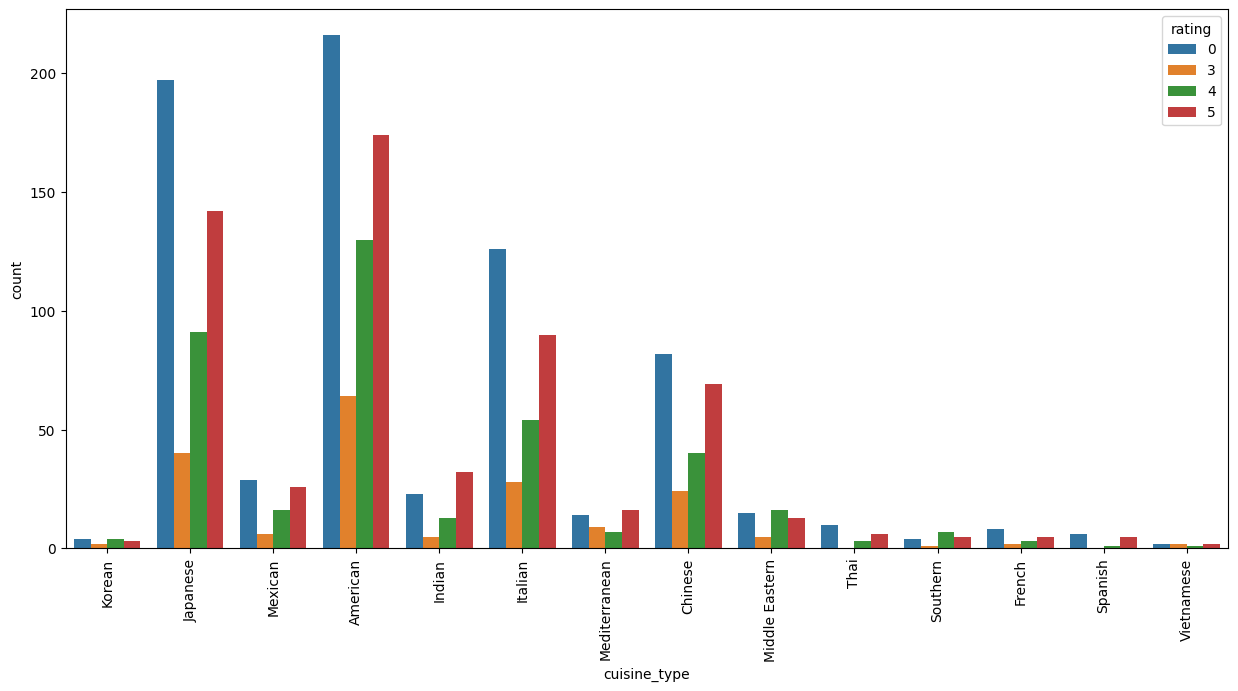

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(data=df, x='cuisine_type', hue='rating');
plt.xticks(rotation=90)
plt.show()

**Observations:**
* orders  without rating spread across all cuisine type

**Observations of Cost  of order versus Cuisine  type**

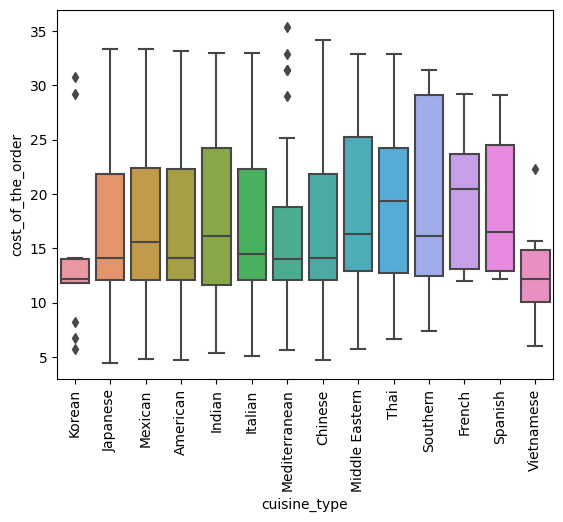

In [ ]:
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=90)
plt.show()

**Observations:**
* there are outliers in cost in Korean, mediterranean and Vietnamese cuisine
* The mean cost is low for American, Italian and Japanese (top 3 ocuisine types ordered) stands below 15USD


**Observations of Rating by Customer id**

In [ ]:
rated  = df.loc[df['rating']>0]
rated['rating'].describe()


count    1162.000000
mean        4.344234
std         0.741478
min         3.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

In [ ]:
rated['customer_id'].value_counts().nlargest(10)


47440     7
52832     7
65009     6
250494    6
276192    5
60052     5
259341    5
47280     5
64153     4
78939     4
Name: customer_id, dtype: int64

In [ ]:
df.groupby(['customer_id'])['rating'].value_counts()

customer_id  rating
1311         0         1
5139         5         1
5444         3         1
5693         0         1
6987         0         1
                      ..
402215       4         1
403019       5         1
403833       0         1
404649       0         1
405334       0         1
Name: rating, Length: 1609, dtype: int64

**Observations:**
* min rating is 3 and max is 5 with the 50% being at 5 indicating left skewness
* top customers noted in Q11 are not all in the top 3 for leaving ratings
 * 52832 out of 13 orders left rating for 7
 * 47440 out of 10 orders left rating for 7
 * 83287 out of 9 orders left rating for 4

**Observations of Delivery time and Rating**

<Axes: xlabel='rating', ylabel='delivery_time'>

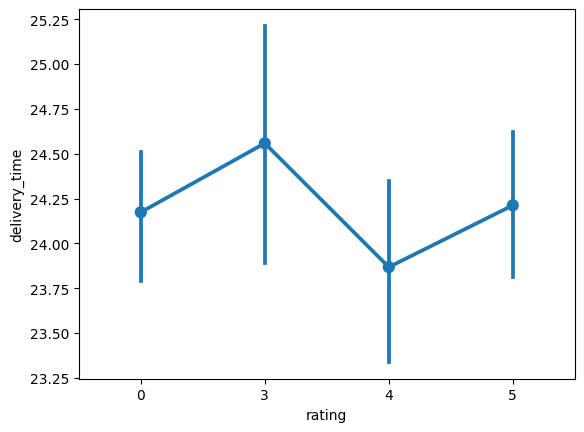

In [ ]:
sns.pointplot(data=df, x='rating', y='delivery_time')

**Observations:**
* Delivery time of orders with rating of 5 is  the same as the ones not received
* Orders received a rating of 3 have longer delivery times

**Observations of Ratings and Food preparation time**

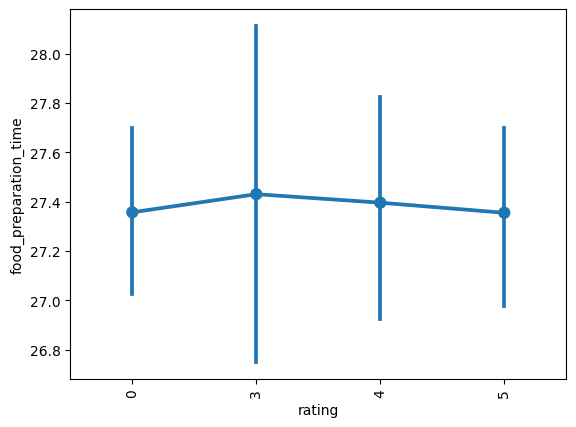

In [ ]:
sns.pointplot(data=df, x='rating', y='food_preparation_time')
plt.xticks(rotation = 90)
plt.show()

**Observations:**
* Orders where food preparation took the longest received the lowest ratings

**Observations of Rating and Cost of order**

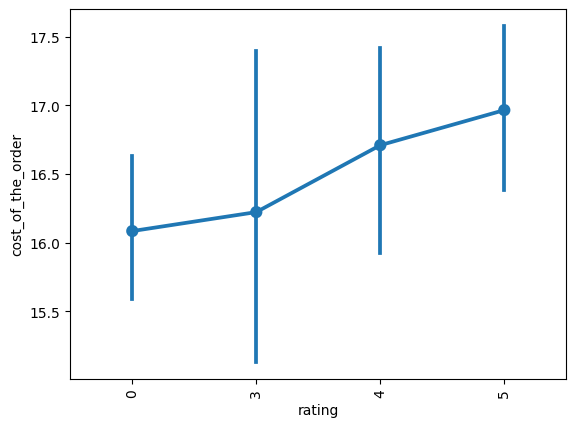

In [ ]:
sns.pointplot(data=df, x='rating', y='cost_of_the_order')
plt.xticks(rotation = 90)
plt.show()

**Observations:**
* High  value  orders have high ratings, lower value orders have lower to no ratings

**Observations of correlations of cost, preparation and delivery time and rating**

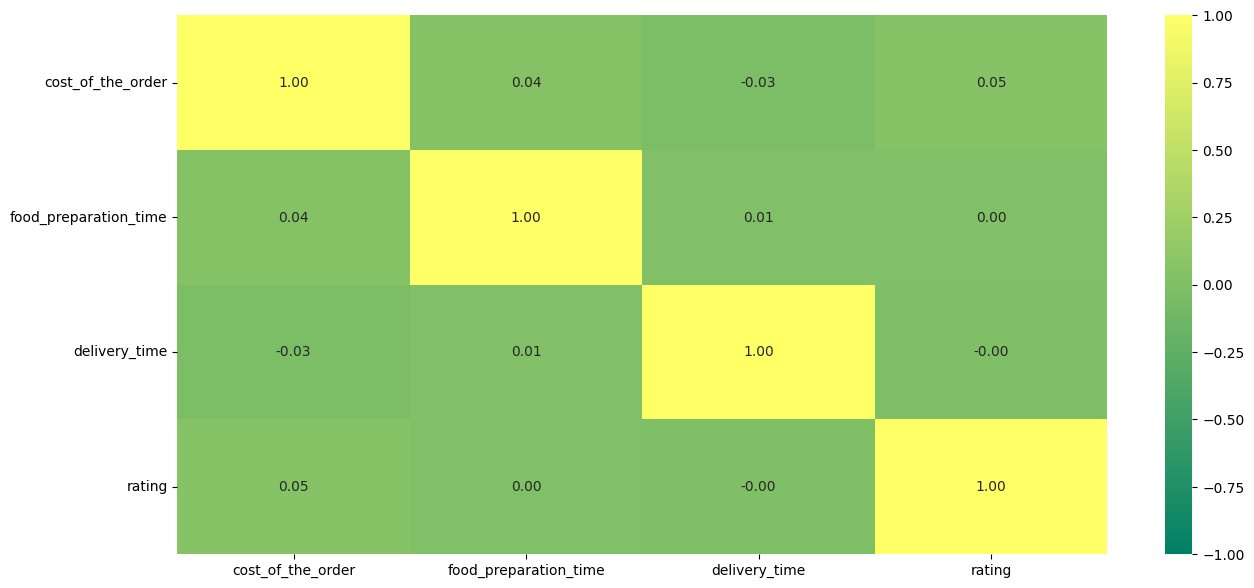

In [ ]:
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="summer")
plt.show()

**Observations:**
* there is a direct correlation between rating and cost of  order
* cost of order and delivery time does not have correlation

**Observations of Cost of order and food preparation time**

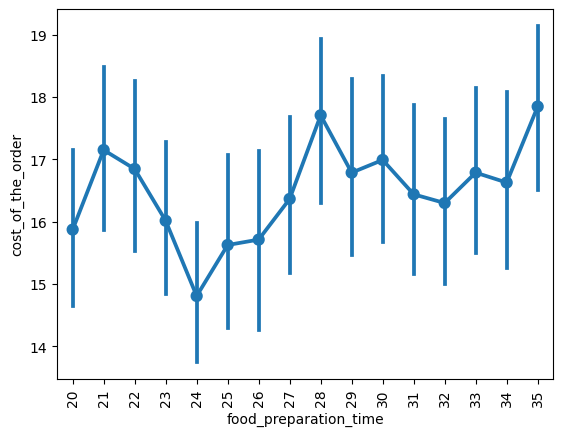

In [ ]:
sns.pointplot(data=df, x='food_preparation_time', y='cost_of_the_order')
plt.xticks(rotation = 90)
plt.show()

**Observations:**
* higher cost of orders have longer preparation time

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
number_of_ratings = df.groupby(['restaurant_name'])['rating'].count() # count up the number of ratings per restaurants


In [ ]:
ranking_count_higher_than_50 = number_of_ratings > 50   # conditioning for the restaurants that have more than 50 ratings
ranking_count_higher_than_50.sum()                      # amount of restaurants comply requirement: the restaurants must have a rating count of more than 50

7

In [ ]:
rated_50_times = number_of_ratings.nlargest(7)         # listing the  restaurants

In [ ]:
table_of_ratings = df.loc[df['rating']>0]                                         # excluding the ratings of 0 to not biase the mean()
ave_rating = table_of_ratings.groupby(['restaurant_name'])['rating'].mean()       # obtaing the average rating by restaurant

In [ ]:
promoted_restaurants = pd.merge(rated_50_times, ave_rating, how='inner', on='restaurant_name')
promoted_restaurants

,rating_x,rating_y
restaurant_name,,
Shake Shack,219,4.278195
The Meatball Shop,132,4.511905
Blue Ribbon Sushi,119,4.219178
Blue Ribbon Fried Chicken,96,4.328125
Parm,68,4.128205
RedFarm Broadway,59,4.243902
RedFarm Hudson,55,4.176471


#### Observations:
The list of restaurants meeting the requirements are:
* Shake Shack
* The Meatball Shop
* Blue Ribbon Sushi
* Blue Ribbon Fried Chicken
* Parm
* RedFarm Broadway
* RedFarm Hudson

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
# Variables to hold values in the loop
revenue_20 = 0
calcul_20_prs_reveue = 0
count_20 = 0
revenue_5 = 0
calcul_5_prs_reveue = 0
count_5 = 0
count_else = 0
for cost in df['cost_of_the_order']:                     # loopping through the rows
  if cost > 20:                                          # when price is higher than 20 than
    calcul_20_prs_reveue = cost * 0.2                    # calculate its revenue
    revenue_20 =  revenue_20 + calcul_20_prs_reveue      # keep up with the revenue total while price is higher than 20 USD
    count_20 += 1                                        # count the amount of orders that fit the condition
  elif 20 >= cost > 5:                                   # identify if price is between 5 and 20 USD
    calcul_5_prs_reveue = cost * 0.05                    # calculate its revenue
    revenue_5 =  revenue_5 + calcul_5_prs_reveue         # # keep up with the revenue total
    count_5 +=  1
  else:
    count_else += 1
    continue
net_revenue = revenue_20 + revenue_5                     # sum up the revenues to find the net revenue
print("The net revenue across all orders  is: ", round(net_revenue, 2), "USD. There are ", count_20, "orders with price higher than 20, and ", count_5, "orders with value between 20 and 5 USD. There are ", count_else, "orders with under 5 USD value." )

The net revenue across all orders  is:  3776.84 USD. There are  555 orders with price higher than 20, and  1334 orders with value between 20 and 5 USD. There are  9 orders with under 5 USD value.


#### Observations:
* The net revenue across all orders  is:  3776.84 USD.
* There are  555 orders with price higher than 20, and  1334 orders with value between 20 and 5 USD.
* There are  9 orders with under 5 USD value.




### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
# Write the code here
df['total_time_to_deliver'] = df['food_preparation_time'] + df['delivery_time']      # added a new column 'total_time_to_deliver' with the sum of food_preparation_time and delivery_time, it is an int and does not have null value
over_60_min =  df.loc[df['total_time_to_deliver']>60]                                # storing the ones that take more than 60 min
iqual_under_60_min =  df.loc[df['total_time_to_deliver']<61]                         # logging the ones that take 60 min or under

# calculating the percentage of each (rounding them to 2 decimals) and printing out the final answer
print( round((over_60_min['total_time_to_deliver'].value_counts().sum()/1898)*100, 2), "% of orders take more than 60 min to deliver, while ", round((iqual_under_60_min['total_time_to_deliver'].value_counts().sum()/1898)*100, 2), "% takes 60 or under 60 min.")


10.54 % of orders take more than 60 min to deliver, while  89.46 % takes 60 or under 60 min.


#### Observations:
* 10.54 % of orders take more than 60 min to deliver
* 89.46 % takes 60 or under 60 min.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Write the code here
round(df.groupby(['day_of_the_week'])['delivery_time'].mean(), 2)

day_of_the_week
Weekday    28.34
Weekend    22.47
Name: delivery_time, dtype: float64

#### Observations:
* On Weekdays the delivery time average is 28.34 min
* On Weekends the delivery time average is 22.47 min


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
We have analysed a dataset of 1898 orders made by registered customers of FoodHub online portal. The main feature of the interest here is how to improve the user experience to improve the business in paralell.

I have been able to conclude the following:
1. On week days the delivery time is almost 6 min slower than weekends.
2. The majority of the orders are on weekends.
3. Vietnamese, Spanish, Korean and Thai are cuisine types that during the week are not ordered.
 investigate further why that is, and see for opportunities to grow on these cuisine types
4. 38% of the orders receive  ratings, when ratings are received they have a mean of 4.34 indicating a good supply of restaurants and quality of service.

5. High  value  orders have high ratings, lower value orders have lower to no ratings

### Recommendations:

1. Delivery time weekdays is longer than on weekends. Most orders are coming in on weekends. Improve weekday delivery time.

2. Most orders are coming in on weekends. Diversify by increasing the weekday deliveries.

3. Grow by cuisine type. Analyse for content and functionality specializations for cuisine types that are ordered less.

4. Increase the % of ratings per order. Increase the % of ratings per order

5. Based on the conclusion nb5. Collect more data of customers and orders to ikeep increasing the order value.

6. Produce more data on orders on cuisine type level combined by time to deliver (preparation time + delivery time). Analyse if based on time to deliver recommendations can be offered to increase orders on weekdays.

---